# Task 1 - Data Analysis and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import socket
import struct
import geopandas as gpd
import os, sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger

# Assuming this class is defined in scripts/
from data_preprocessor import DataPreprocessor  
from data_visualizer import DataVisualizer
from geolocation_analyzer import GeolocationAnalyzer
from feature_engineering import FeatureEngineering

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

**Loading the Data**

In [2]:
# Initialize the DataPreprocessor with the logger and the path to the dataset
data_preprocessor = DataPreprocessor(filepath='../data/Fraud_Data.csv', logger=logger)

In [3]:
# Load the dataset
fraud_data = data_preprocessor.load_dataset()

**Understand the Properties Data**

- This step provides an overview of the dataset, including displaying the first few rows, dataset information, and a summary of basic statistic.

In [4]:
# First 5 rows of the dataset
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
# Dataset Information
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


**Cleaning the Data**

**These are:**

- Handle missing values
- Convert data types
- Handle duplicates

In [6]:
# Check for missing values in the dataset
missing_values = fraud_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"There are {missing_values.sum()} missing values in the dataset.")

Missing Values in Each Column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
No missing values found in the dataset.


- No missing values found in the dataset.

===> **Short Summary**

- **Missing Values:** No missing values found in the dataset.
- **Data Types:** All data types are correct except for signup_time and purchase_time, which are currently of type object.
- **Conversion:** The signup_time and purchase_time columns will be converted to standard datetime format.

**Conversion the Date type for signup_time and purchase_time**

In [7]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

# Verify the data types after conversion
print("Data Types After Conversion:")
print(fraud_data.dtypes)

Data Types After Conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


**Duplicate rows**

In [8]:
# Check for duplicate rows in the DataFrame
duplicate_count = fraud_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count:
    fraud_data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


**Short summary:**

- All data types are now in the appropriate format after conversion.

- Specifically, signup_time and purchase_time have been successfully converted to standard datetime format.

- No duplicated rows in the dataset

**Summary Statistics**

In [9]:
# Summary Statistics of numerical features
fraud_data.describe(include='number')

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


**Short Summary:**

- Data Overview: The dataset contains 151,112 records with the following features:

- user_id: Ranges from 2 to 400,000, with a mean of 200,171.04.

- purchase_value: Ranges from 9 to 154, with a mean of 36.94 and a standard deviation of 18.32.

- age: Ranges from 18 to 76, with a mean of 33.14 and a standard deviation of 8.62.

- ip_address: Values range significantly, indicating a wide geographical distribution.

- class: Binary variable with a mean of 0.09, suggesting a low prevalence of the positive class.

In [10]:
# Statistical summary of object data features
fraud_data.describe(include='object')

,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,ITUMJCKWEYNDD,SEO,Chrome,M
freq,20,60615,61432,88293


**Statistical summary:**

- Data Overview: The dataset contains 151,112 records with the following features:

- device_id: 137,956 unique values, with the most frequent device ID being CQTUVBYIWWWBC, which appears 20 times.

- source: 3 unique sources, with SEO as the most common source, accounting for 60,615 records.

- browser: 5 unique browsers, with Chrome being the most used, appearing in 61,432 records.

- sex: 2 unique categories (M/F), with M (Male) being the predominant category, recorded 88,293 times.

# Exploratory Data Analysis (EDA)

# Univariate Analysis

- Numerical Features

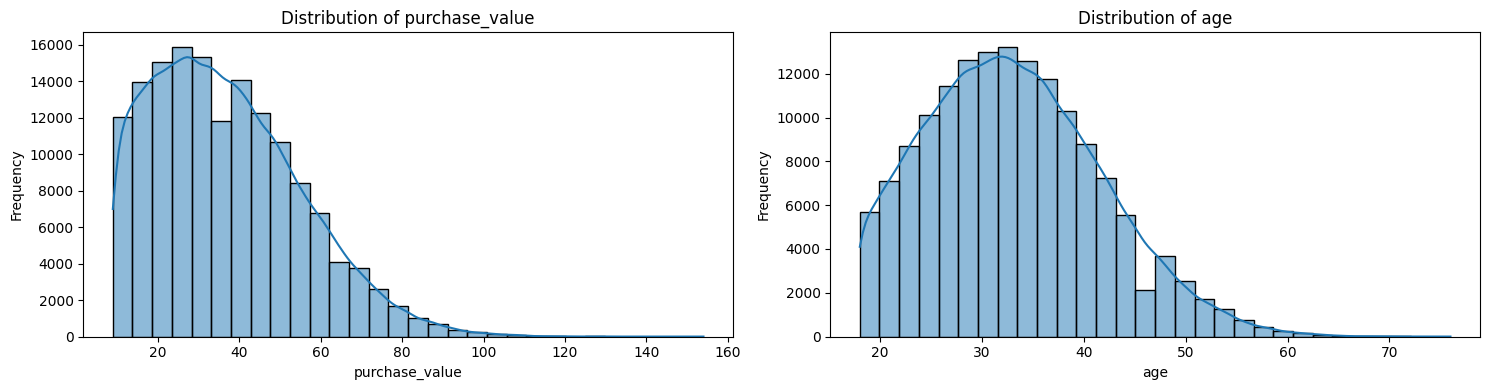

In [11]:
# Define numerical features
numerical_features = ['purchase_value', 'age']

# Define categorical features
categorical_features = ['source', 'browser', 'sex']

# Create instance of the DataVisualizer(data, target_col)
visualizer = DataVisualizer(fraud_data, numerical_features, categorical_features, 'class', logger)


visualizer._plot_histograms()  # To plot histograms

**Observation:**

- Purchase Value Distribution: The distribution is right-skewed, with the majority of purchase values concentrated between 10 and 50. As the purchase value increases, the frequency drops, with very few transactions above 100.

- Age Distribution: Similarly, the age distribution is right-skewed, with most individuals between the ages of 20 and 40. There are progressively fewer individuals as age increases beyond 40, with very few older than 60.

- Skewness: Both distributions are right-skewed, indicating a decreasing frequency for higher purchase values and older individuals.

- Categorical features

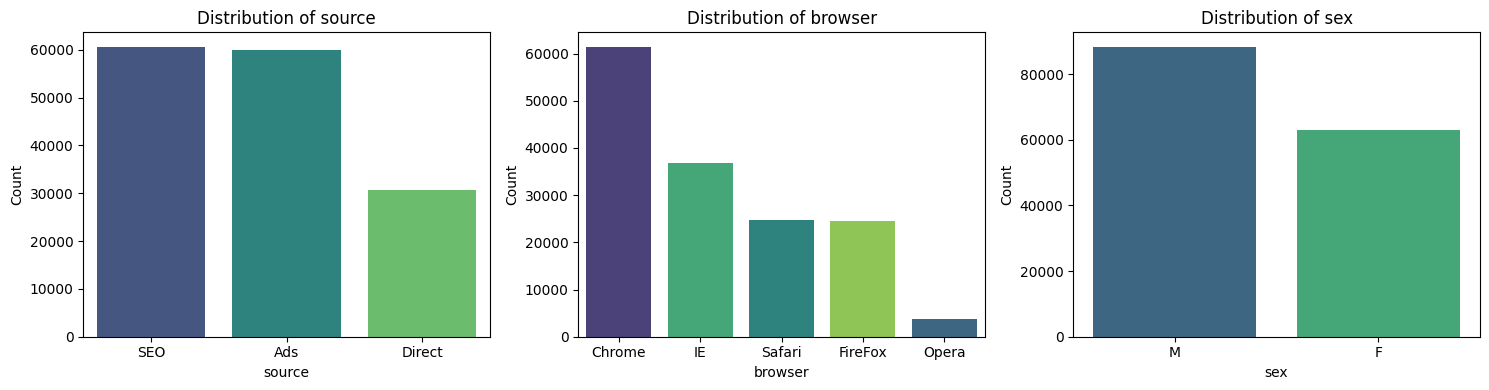

In [12]:
# Visualize the distribution
visualizer._plot_counts() # To plot counts for categorical features

**Observation:**

- Source Distribution: SEO and Ads sources are nearly equally common, with each having close to 60,000 counts. Direct traffic is noticeably lower, with fewer than 40,000 counts.

- Browser Distribution: Chrome is the most used browser, with around 60,000 users. Internet Explorer (IE) follows but with significantly lower usage. Safari and Firefox have similar, lower usage levels, while Opera has the least.

- Sex Distribution: Males (M) are more frequent than females (F), with approximately 90,000 male users compared to around 70,000 female users.

**Bivariate Analysis**

- Purchase Value vs Age

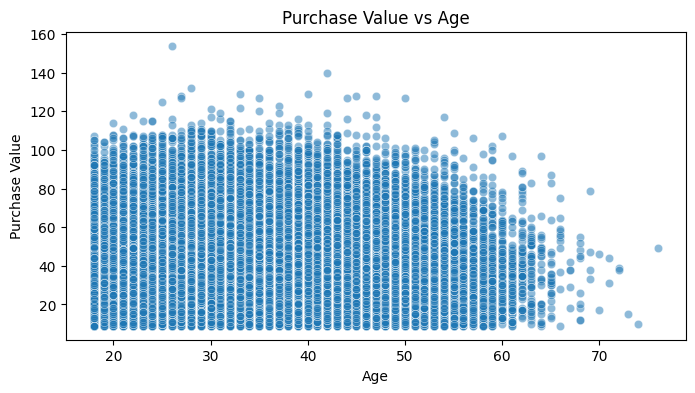

In [13]:
# Plot relationship between purchase_value vs age
visualizer.plot_relationship()

**Observation:**

- Relationship: The scatter plot shows purchase value against age.

- Pattern: Purchase values are fairly consistent across ages 20 to 50, with values spread between 20 and 140.

- Decline: For ages above 50, purchase values gradually decrease, indicating fewer high-value purchases among older individuals.

- Purchase Value by Sex

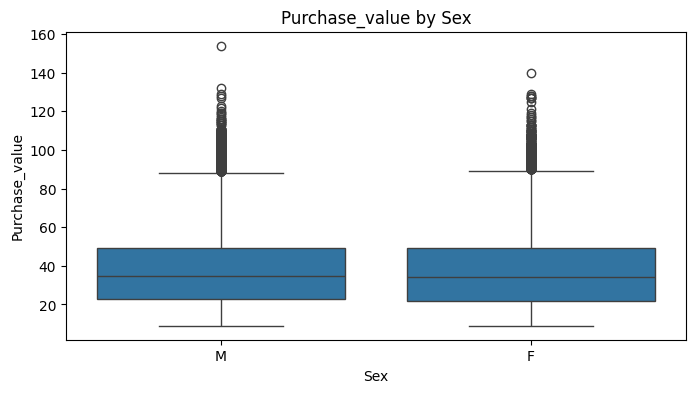

In [14]:
# Boxplot for purchase_value by sex
visualizer._boxplot('sex', 'purchase_value')

**Observation:**

- Relationship: The box plot compares purchase values between two sexes: male (M) and female (F).

- Pattern: The median purchase value is similar for both males and females. However, the distribution of purchase values differs:

    - Males: The distribution is slightly wider, with a few outliers indicating higher purchase values.

    - Females: The distribution is more concentrated around the median, with fewer outliers, suggesting a more consistent spending pattern.

Purchase Value by Target(Class)

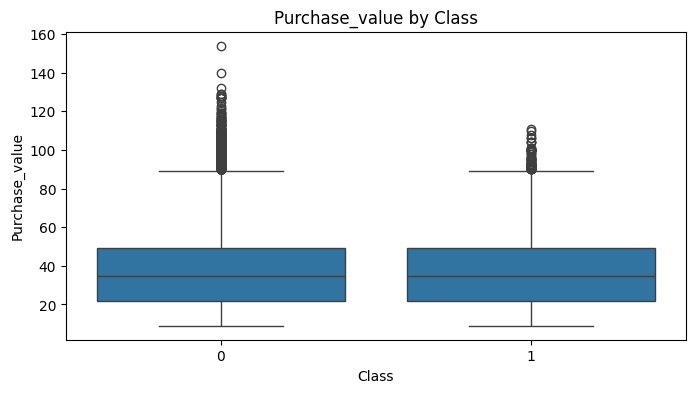

In [15]:
# Boxplot for purchase_value grouped by class
visualizer._boxplot('class', 'purchase_value')

**Observation:**

**Pattern:**

    - Non-Fraud (0): The distribution is wider, with a few outliers indicating higher purchase values. This suggests more variability in the purchase amounts.

    - Fraud (1): The distribution is more concentrated around the median, with fewer outliers, suggesting a more consistent spending pattern for fraudulent transactions.

**Summary:** The median purchase values are similar between the two classes, but class 0 (non-fraud) shows a broader range of spending, with some individuals making significantly higher purchases than those in class 1 (fraud).

**Plot Pairwise relationship between numerical features and target variable**

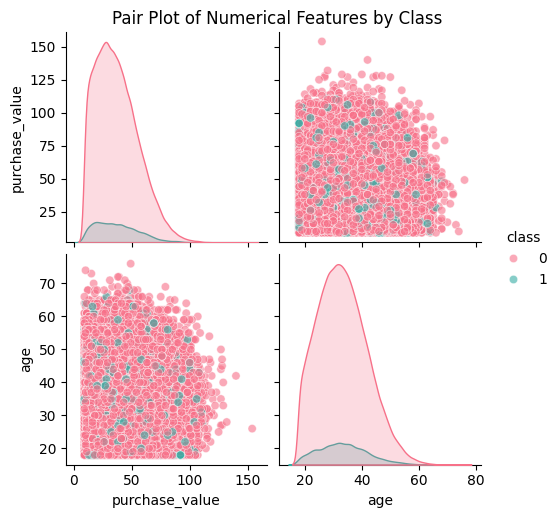

In [16]:
# Pairwise relationship
visualizer.plot_pairwise_relationships()

**Observation:**

The pair plot highlights relationships between numerical features (purchase_value and age) and the target variable (class).

**Insights:**

- High overlap in purchase value distributions between classes 0 (Non-Fraud) and 1 (Fraud) suggests that purchase value alone may not effectively predict class.

- The considerable overlap in age distributions for classes 0 (Non-Fraud) and 1 (Fraud) implies that age may not be a strong predictor of class either.

**Summary:** The scatter plot indicates a weak positive correlation, suggesting older individuals tend to make slightly higher purchases on average. However, this relationship is not particularly strong.

**The distribution of varies features by Target variable(class)**

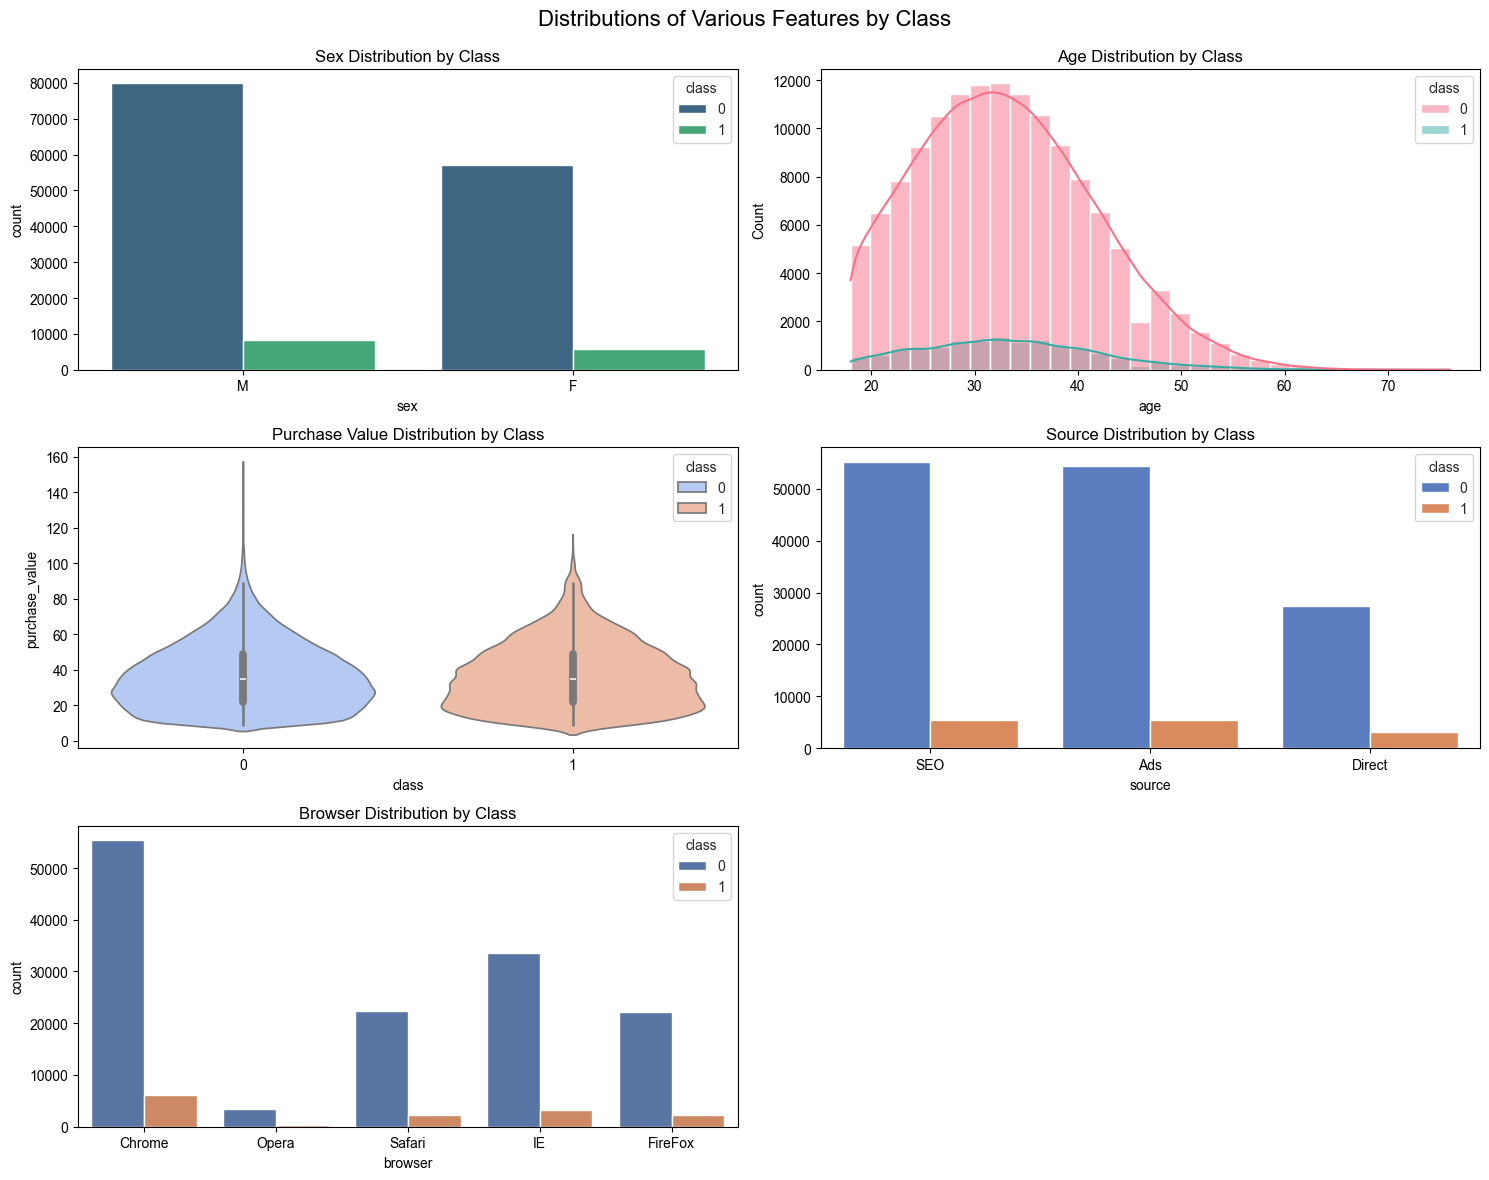

In [17]:
# plot the distribution of varies feature variables by target variable
visualizer.plot_distribution_by_class()

**Observation:**

The plots reveal differences in the distributions of categorical features (Sex, Source, Browser) between the two classes.

Insights:

**Sex Distribution:**
- Class 0: Higher proportion of males (M) compared to females (F).
- Class 1: More balanced distribution, with a slight majority of females.

**Source Distribution:**
- Class 0: Predominantly from organic search (SEO), followed by paid advertising (Ads).
- Class 1: More balanced across sources, with a slight preference for direct traffic.

**Browser Distribution:**
- Class 0: Popular browsers include Chrome, Internet Explorer (IE), and Safari.
- Class 1: More concentrated usage of Chrome, with fewer users on Opera and Safari.

**Browser usage and purchase value by target variable**

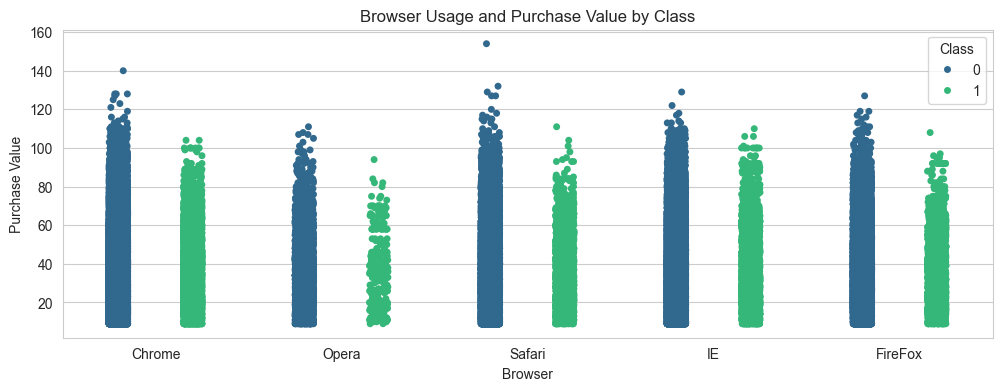

In [18]:
# Browser usage and Purchase value distribution by target variable
visualizer.plot_browser_usage()

**Observation:**

- Browser Overlap: Most browsers (Chrome, Opera, Safari, IE) show significant overlap in purchase values between non-fraud (class 0) and fraud (class 1) users, suggesting that browser usage is not a strong predictor of fraudulent behavior.

- Distinct Separation: FireFox users demonstrate a clearer separation, with non-fraud users (class 0) having consistently higher purchase values. This suggests that FireFox might be a moderately informative feature for identifying fraud.

**Source vs Browser**

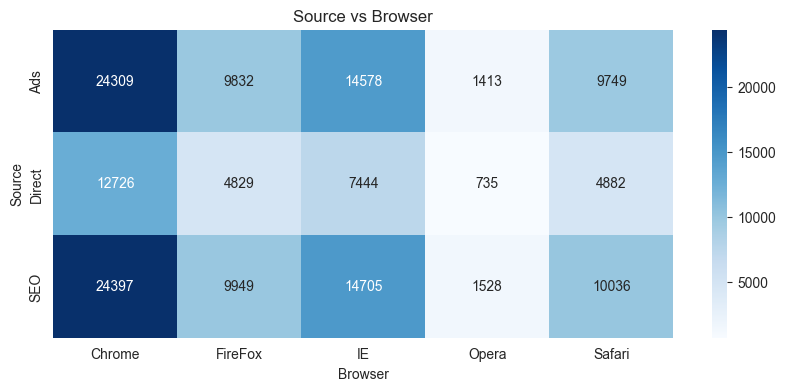

In [19]:
# Cross-tabulation and heatmap for source and browser
visualizer.plot_source_vs_browser_heatmap()

**Observation:**

- Chrome is the most popular browser across all traffic sources.

- SEO is the dominant traffic source for most browsers.

- Ads and Direct traffic are more common for Chrome and IE, while Firefox, Opera, and Safari rely mainly on SEO.

**User purchase analysis**

- Purchase delay distribution

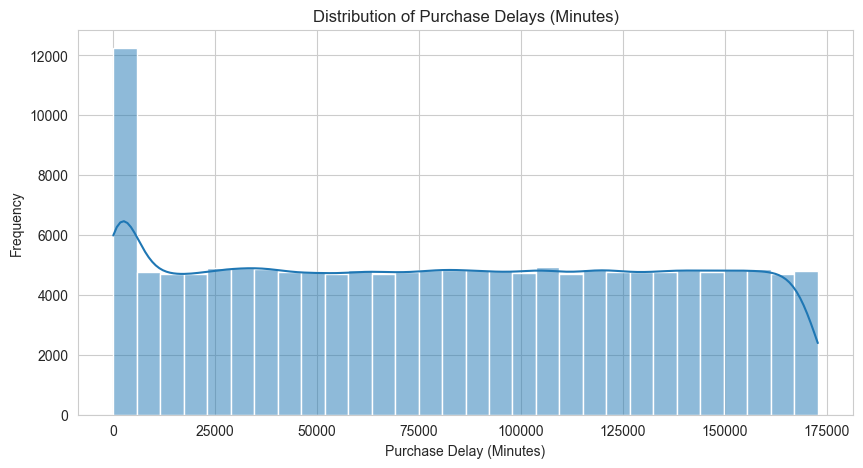

In [20]:
visualizer.plot_purchase_delay_distribution()

**Observation:**

- Most purchases are completed within a short timeframe, with delays predominantly under 25,000 minutes.

- A notable number of purchases experience long delays, as indicated by the distribution's long tail.

- Purchase Patterns Over Time

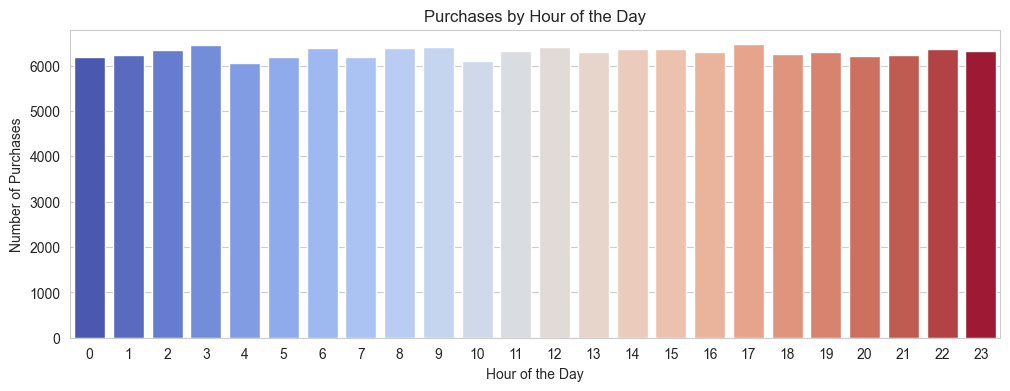

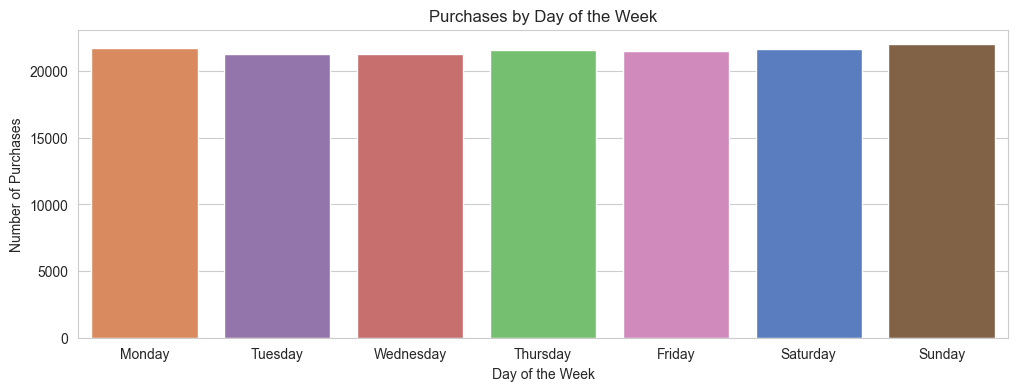

In [21]:
visualizer.plot_purchase_patterns_over_time()

**Observation:**

- The purchase counts are fairly consistent across all hours of the day, with no significant peaks or valleys, indicating steady activity throughout the day.

- There are slight increases during some hours, but the differences are minimal, suggesting that customer purchasing behavior is relatively stable rather than exhibiting pronounced peak times.

**Implication:** This consistent pattern indicates that marketing strategies could be effectively spread throughout the day, rather than being concentrated at specific times.

- The purchase volumes across the days of the week are relatively similar. There is a slightly higher purchase count on Monday and Sunday, which may relate to weekend shopping or the start of the workweek.

**Correlation Between Purchase Delay and Purchase Value**

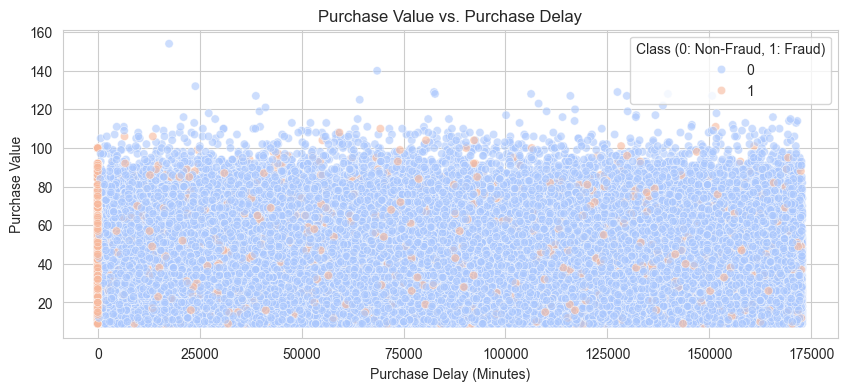

In [22]:
visualizer.plot_purchase_value_vs_delay()

**Observation:**

- Purchase value and purchase delay do not provide a reliable basis for predicting fraud, as both classes (non-fraud and fraud) are widely overlapping.

- Additional features, such as transaction history or customer information, are likely needed for accurate classification.

- Outliers may indicate fraudulent activity; further investigation into these outliers could reveal patterns associated with fraud.

**Geolocation Analysis**

**Merge Datasets for Geolocation Analysis**
- Convert IP addresses to integer format
- Merge Fraud_Data.csv with IpAddress_to_Country.csv

In [23]:
def ip_to_int(ip):
    """Convert an IP address to its integer representation."""
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except socket.error:
        return None  # Handle invalid IPs gracefully

# Load the datasets
fraud_data = fraud_data.copy()
ip_country_data = pd.read_csv('../data/IpAddress_to_Country.csv')

# Convert IP addresses in fraud data to integer format
fraud_data['ip_int'] = fraud_data['ip_address'].apply(lambda x: ip_to_int(str(int(x))) if not pd.isna(x) else None)

# Drop rows with invalid IPs
fraud_data.dropna(subset=['ip_int'], inplace=True)

# Convert bounds in the country data to integer
ip_country_data['lower_bound_ip_address'] = ip_country_data['lower_bound_ip_address'].astype(int)
ip_country_data['upper_bound_ip_address'] = ip_country_data['upper_bound_ip_address'].astype(int)

# Sort both datasets for merge_asof
fraud_data.sort_values('ip_int', inplace=True)
ip_country_data.sort_values('lower_bound_ip_address', inplace=True)

# Merge the datasets using merge_asof
merged_data = pd.merge_asof(
    fraud_data,
    ip_country_data,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter rows where ip_int is within the lower and upper bounds
merged_data = merged_data[(merged_data['ip_int'] >= merged_data['lower_bound_ip_address']) &
                        (merged_data['ip_int'] <= merged_data['upper_bound_ip_address'])]

# Drop unnecessary columns
merged_data.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)

# OPTIONAL: Save to csv file
merged_data.to_csv('../data/merged_fraud_data.csv')
# Display the first few rows of the merged dataset with country information
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,hour_of_day,day_of_week,ip_int,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,60536.916667,3,Sunday,16778864,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,20527.283333,20,Wednesday,16842045,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,33292.233333,23,Saturday,16843656,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,127348.283333,16,Saturday,16938732,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,170826.316667,4,Tuesday,16971984,Thailand


- Temporal Analysis of Fraudulent Transactions by Country

<Figure size 1400x700 with 0 Axes>

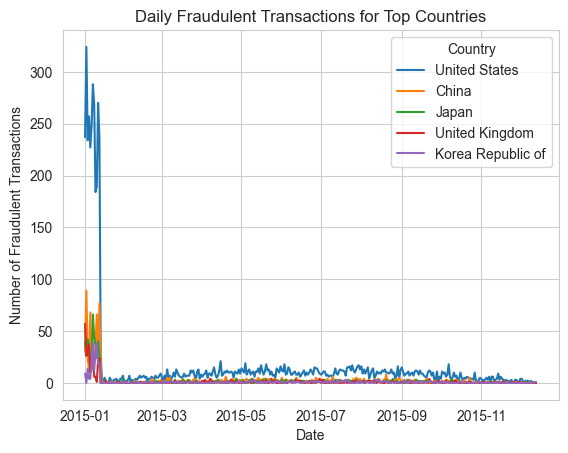

In [24]:
# Convert 'purchase_time' to datetime format
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

# Group fraudulent transactions by day and country
daily_fraud = merged_data[merged_data['class'] == 1].groupby([merged_data['purchase_time'].dt.date, 'country']).size().unstack().fillna(0)

# Determine the top countries with the highest number of fraudulent transactions
top_countries = daily_fraud.sum().nlargest(5).index

# Plotting fraud trends over time for the top countries
plt.figure(figsize=(14, 7))
daily_fraud[top_countries].plot()
plt.title('Daily Fraudulent Transactions for Top Countries')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Country')
plt.show()

**Observation:**

- United States: Had the highest number of fraudulent transactions initially, with a slight decrease over time.

- China: Showed moderate fraudulent activity but experienced a significant decline.

- Japan, United Kingdom, and Korea: Displayed lower fraudulent transaction volumes, respectively

- Load the World GeoDataFrame

In [26]:
# Initialize the class with file paths
fraud_data_path = '../data/merged_fraud_data.csv'
world_data_path = '../data/ne_110m_admin_0_countries.shp'

# Load your data as DataFrames
fraud_data = pd.read_csv(fraud_data_path)
world_data = gpd.read_file(world_data_path)

# Initialize the class with DataFrames and the logger
geo_analyzer = GeolocationAnalyzer(fraud_data=fraud_data, 
                                world_gdata=world_data, 
                                logger=logger)

geo_analyzer.analyze()

DataSourceError: ../data/ne_110m_admin_0_countries.shp: No such file or directory

In [27]:
# Calculate total transaction volumes by country
highestTranscation = geo_analyzer.calculate_transaction_volume()

highestTranscation.sort_values(by='transaction_volume', ascending=False).head(10)

NameError: name 'geo_analyzer' is not defined

In [28]:
# Visualize the transaction volume in each contry in the world
# For transaction volume map
geo_analyzer.plot_transaction_volume_map()

NameError: name 'geo_analyzer' is not defined

**Observatio:**

- Significant Transaction Volume: The United States stands out with the highest transaction volume, indicated by the dark blue shading, suggesting that the U.S. is a major contributor to the global transaction volume.

- Regional Activity: Other countries, including China and parts of Europe, show moderate transaction volumes, with lighter blue shading. These regions also play a significant role in global transaction activity but at a lower scale compared to the U.S.

- Insights: The transaction volume is highly concentrated in a few key regions, with most of the world showing minimal or no transaction activity based on the data.

**Feature Engineering**

In [29]:
# Initialize the class with the DataFrame
feature_engineering = FeatureEngineering(fraud_data, logger)

# Run the pipeline to process the data
feature_engineering.pipeline()

# Retrieve the processed DataFrame
processed_data = feature_engineering.get_processed_data()

# View the processed data
display(processed_data.head())

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,purchase_delay,hour_of_day,day_of_week,ip_int,country,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.549607,KIXYSVCHIPQBR,-0.363124,1.677886e+07,0,-0.413800,-1.231124,1.487911,16778864,Australia,0.0,-0.259874,-0.232945,False,True,False,False,False,True,False
1,635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.197335,PKYOWQKWGJNJI,0.101168,1.684205e+07,0,-1.180852,1.229002,-0.505034,16842045,Thailand,0.0,-0.259874,-0.232943,False,True,False,False,False,False,False
2,636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.385831,LVCSXLISZHVUO,-0.479197,1.684366e+07,0,-0.936126,1.663142,0.989675,16843656,China,0.0,0.116936,-0.232944,False,False,False,True,False,False,True
3,637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.986342,UHAUHNXXUADJE,-0.363124,1.693873e+07,0,0.867086,0.650149,0.989675,16938732,China,0.0,-0.259874,-0.232946,True,False,False,False,False,False,False
4,638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.767974,XPGPMOHIDRMGE,0.449387,1.697198e+07,0,1.700633,-1.086411,-1.003270,16971984,Thailand,0.0,-0.259874,-0.232946,False,True,False,False,False,False,False


In [ ]:
# Save the processed datase to the csv for modeling
processed_data.to_csv('../data/processed_fraud_data.csv')